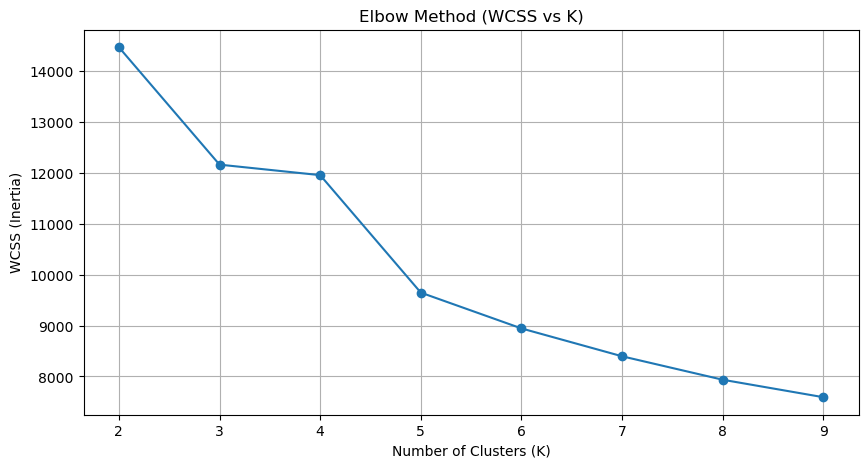

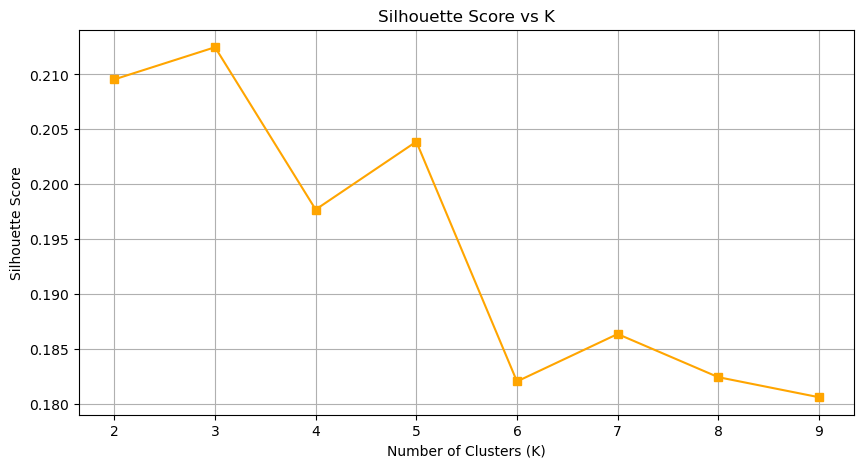

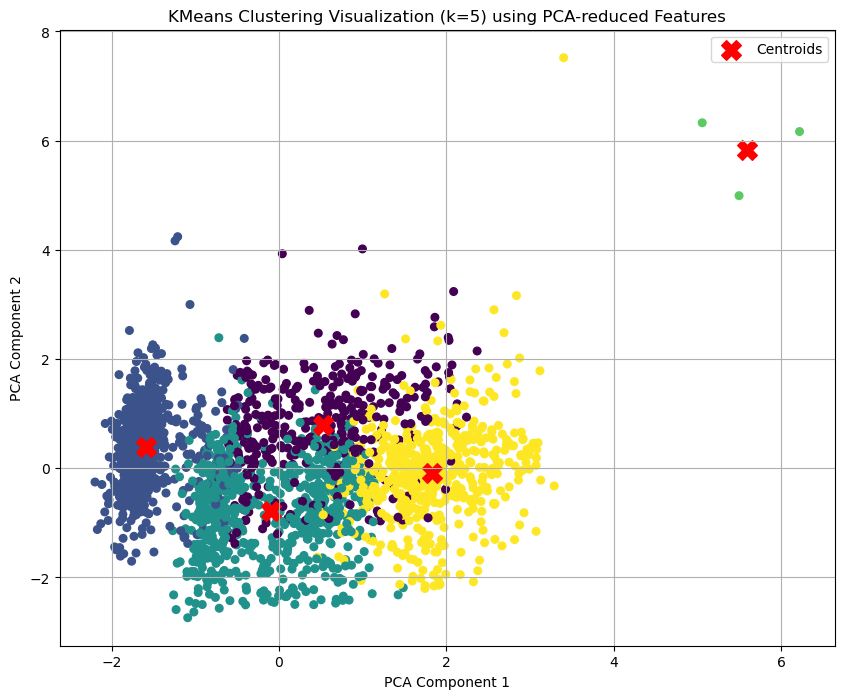

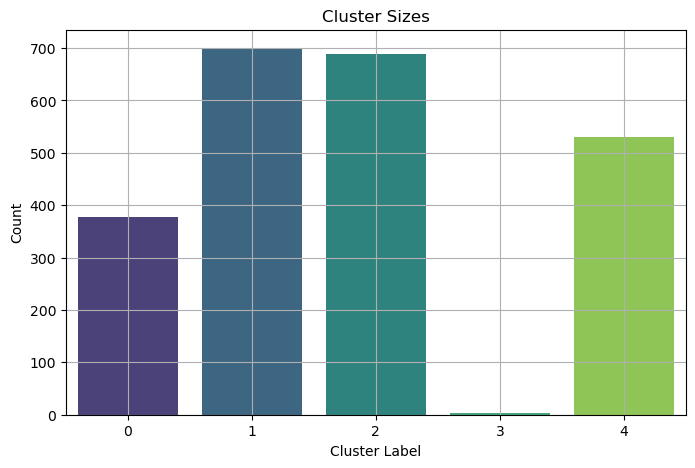

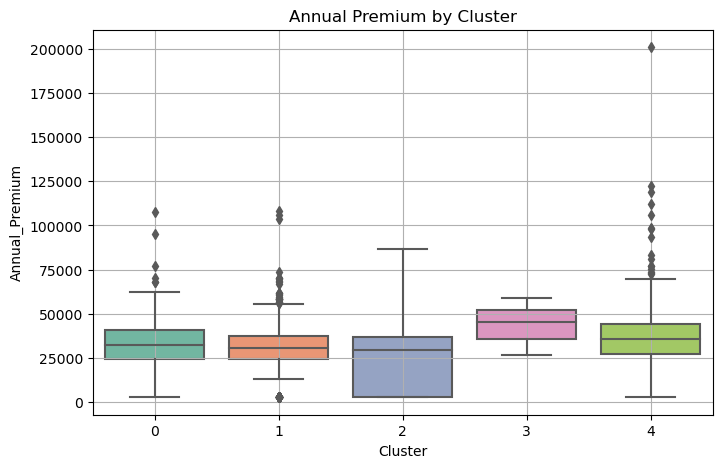

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# === Load and prepare the data ===
df = pd.read_csv("car_insurance.csv")  # Make sure this file is in your working directory
df = df.drop(columns=["id"])  # Drop non-informative ID column

# === Preprocessing: Encode categoricals and scale numericals ===
categorical_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
numerical_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 
                  'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop='first'), categorical_cols),
    ("num", StandardScaler(), numerical_cols)
])

# Fit and transform
X_preprocessed = preprocessor.fit_transform(df)

# === Reduce to 2D with PCA for visualization ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# === Evaluate KMeans for different values of k ===
wcss = []
silhouettes = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_preprocessed)
    wcss.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_preprocessed, kmeans.labels_))

# === Plot Elbow Method ===
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method (WCSS vs K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

# === Plot Silhouette Scores ===
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouettes, marker='s', color='orange')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# === Final Clustering Visualization with Best K (e.g. K=5) ===
k_final = 5
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_preprocessed)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=30)
plt.scatter(pca.transform(kmeans_final.cluster_centers_)[:, 0], 
            pca.transform(kmeans_final.cluster_centers_)[:, 1], 
            s=200, c='red', label='Centroids', marker='X')
plt.title(f'KMeans Clustering Visualization (k={k_final}) using PCA-reduced Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x=clusters, palette='viridis')
plt.title("Cluster Sizes")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Add cluster labels to original dataframe
df_clustered = df.copy()
df_clustered["Cluster"] = clusters

# Example: Boxplot for Annual_Premium by cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='Annual_Premium', data=df_clustered, palette='Set2')
plt.title("Annual Premium by Cluster")
plt.grid(True)
plt.show()

